In [1]:
#import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data csv
df = pd.read_csv(r"C:\Users\leons\OneDrive\Documentos\Projects\archive (3)\WA_Marketing-Campaign.csv")

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
## Gather descriptive statistics about the data
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [5]:
df.shape

(548, 7)

In [6]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [7]:
# Display all column names
print(df.columns)

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')


In [8]:
#check for mussing data
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [9]:
#check for duplicates
df.duplicated().sum()

0

In [28]:
df = df.rename(columns =  {'MarketID' : 'market_id',
                        'MarketSize' : 'market_size',
                       'LocationID' : 'location_id',
                       'AgeOfStore' : 'age_of_store',
                       'Promotion' : 'promotion',
                       'SalesInThousands' : 'sales_in_thousands'
    
})

df.columns

Index(['market_id', 'market_size', 'location_id', 'age_of_store', 'promotion',
       'week', 'sales_in_thousands'],
      dtype='object')

In [11]:
#summarise sales by promotion
df.groupby('promotion')['sales_in_thousands'].describe()

,count,mean,std,min,25%,50%,75%,max
promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


In [12]:
df.groupby('promotion')['sales_in_thousands'].sum()

promotion
1     9993.03
2     8897.93
3    10408.52
Name: sales_in_thousands, dtype: float64

<Axes: xlabel='promotion', ylabel='sales_in_thousands'>

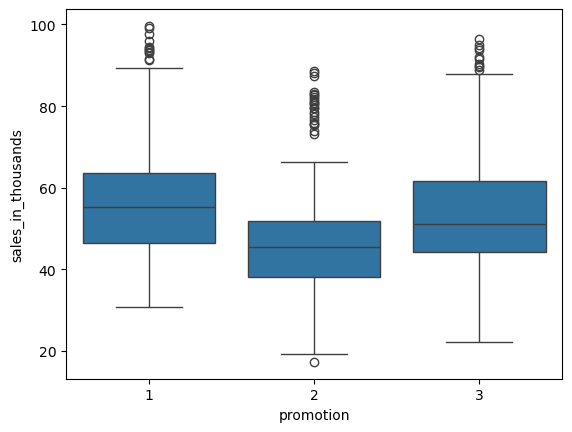

In [13]:
sns.boxplot(data= df, y = 'sales_in_thousands', x = 'promotion')

Promotion 1 and Promotion 2 are very similar in terms of sales

In [17]:
df.groupby(['promotion', 'week'])['sales_in_thousands'].mean().unstack()

week,1,2,3,4
promotion,,,,
1,58.244419,56.929535,58.774884,58.447209
2,47.730213,47.582553,47.722128,46.282766
3,55.776170,55.949149,54.377872,55.354681


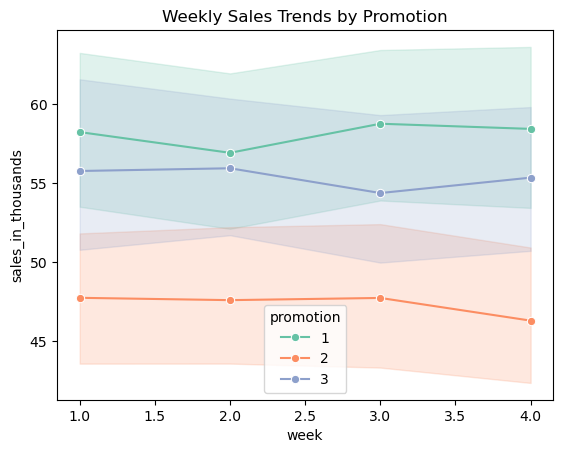

In [19]:
sns.lineplot(data=df, x='week', y='sales_in_thousands', hue='promotion', marker='o', palette='Set2')
plt.title("Weekly Sales Trends by Promotion")
plt.show()

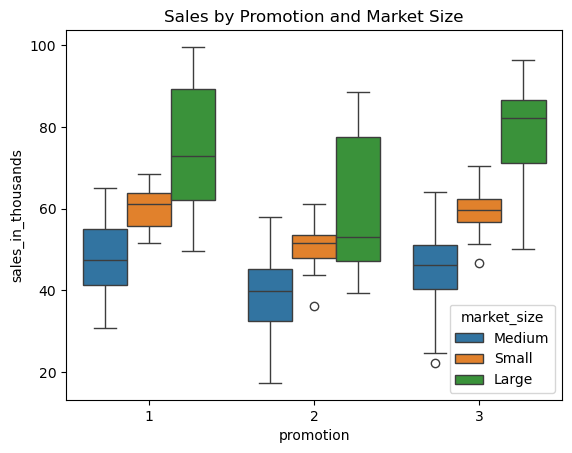

In [20]:
sns.boxplot(data=df, x='promotion', y='sales_in_thousands', hue='market_size')
plt.title("Sales by Promotion and Market Size")
plt.show()

Large market size have higher sales. Smaller markets more posisitvely impacted than medium.

Text(0.5, 1.0, 'Sales vs Store Age')

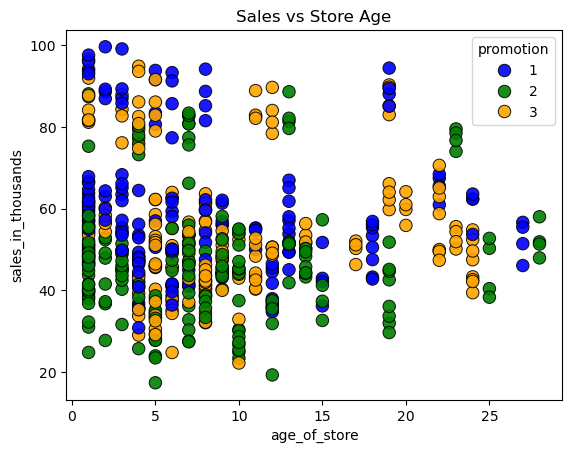

In [65]:
sns.scatterplot(
    data=df,
    x='age_of_store', y='sales_in_thousands', hue='promotion',
    palette=['blue','green','orange'],
    s=80, alpha=0.9, edgecolor='k'
)

plt.title("Sales vs Store Age")

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

In [66]:
# Fit the linear regression model

model = ols(formula = "sales_in_thousands ~ C(promotion)", data = df).fit()

In [56]:
# OLS regression results.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sales_in_thousands   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     21.95
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           6.77e-10
Time:                        14:55:40   Log-Likelihood:                -2300.5
No. Observations:                 548   AIC:                             4607.
Df Residuals:                     545   BIC:                             4620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            58.0990      1.231     47.186      0.000      55.680      60.518
C(promotion)[T.2]   -10.7696      1.704     -6.321      0.000     -14.116      -7.423
C(promotion)[T.3]    -2.7345      1.704     -1.605      0.109      -6.081       0.612
==============================================================================
Omnibus:                       52.072   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.242
Skew:                           0.842   Prob(JB):                     6.81e-15
Kurtosis:                       3.137   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept = mean sales of baseline (Promotion 1)

- Other coefficients = difference from baseline

- p-values - significance of difference

In [58]:
# Residuals from model
residuals = model.resid

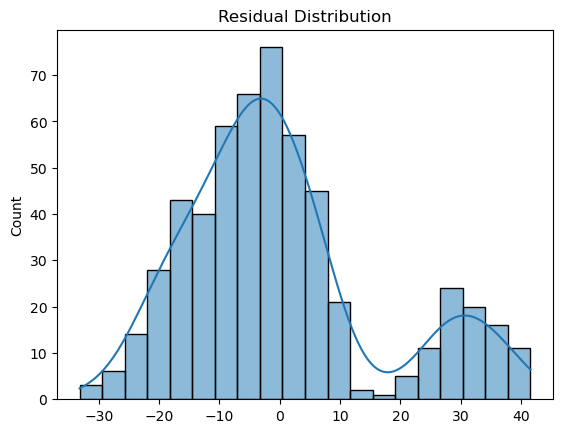

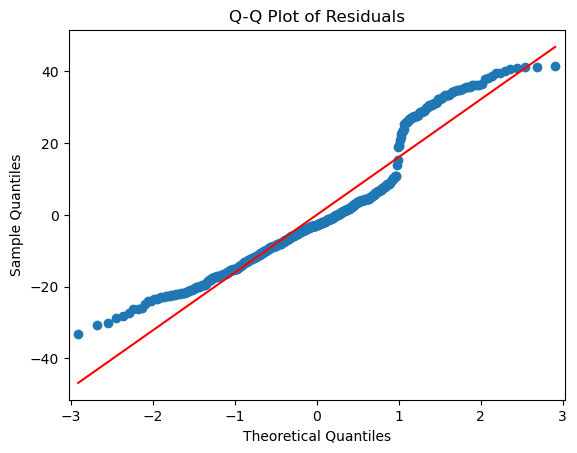

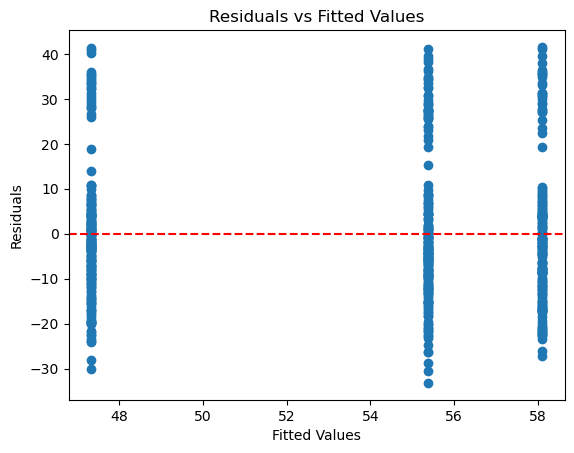

In [62]:
#density plot
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Q-Q plot (normality check)
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Residuals vs Fitted values (homoscedasticity check)
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


Checked the residuals from the OLS regression to ensure the ANOVA assumptions were met:

Normality: Histogram and Q-Q plot show residuals are approximately normally distributed.

Homoscedasticity: Residuals vs fitted values show no clear pattern, indicating roughly equal variance across promotions.

Conclusion: No major violations were observed, supporting the validity of the ANOVA results.

In [54]:
# one-way ANOVA table for the fit model.
anova_results = anova_lm(model, typ=2)  
anova_results

,sum_sq,df,F,PR(>F)
C(promotion),11449.174291,2.0,21.953486,6.765849e-10
Residual,142114.105414,545.0,NaN,NaN


The F-statistic = 21.95 compares the variance in sales between promotions to the variance within promotions.

The p-value ≈ 6.77 × 10⁻¹⁰ is far below 0.05, indicating that the differences in mean sales across promotions are statistically significant.

Conclusion: At least one promotion leads to a significantly different mean sales than the others.

In [43]:
#Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(
    endog=df['sales_in_thousands'],  # dependent variable
    groups=df['promotion'],          # categorical variable
    alpha=0.05                       #95% confidence interval
)

In [67]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


- Promotion 1 vs 2 - significant difference

- Promotion 1 vs 3 - not significant

- Promotion 2 vs 3 - significant difference

In [48]:
# Group by promotion
grouped = df.groupby('promotion')['sales_in_thousands']

# Compute mean and 95% CI for each promotion
summary = pd.DataFrame({
    'mean': grouped.mean(),
    'count': grouped.count(),
    'std': grouped.std()
})

# Standard error
summary['sem'] = summary['std'] / np.sqrt(summary['count'])

# 95% CI
confidence = 0.95
ci_multiplier = stats.t.ppf((1 + confidence) / 2, df=summary['count']-1)
summary['ci_lower'] = summary['mean'] - ci_multiplier * summary['sem']
summary['ci_upper'] = summary['mean'] + ci_multiplier * summary['sem']

summary

,mean,count,std,sem,ci_lower,ci_upper
promotion,,,,,,
1,58.099012,172,16.553782,1.262214,55.607485,60.590539
2,47.329415,188,15.108955,1.101934,45.155596,49.503234
3,55.364468,188,16.766231,1.222803,52.952207,57.776730


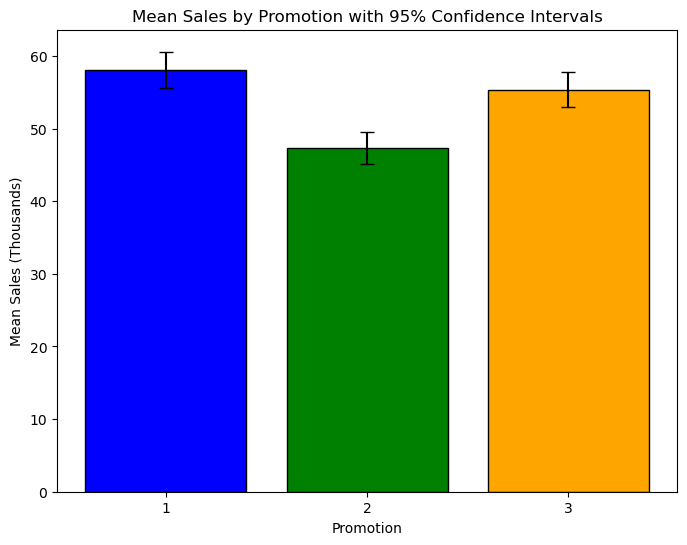

In [50]:
# Convert promotion to string labels for better plotting
summary = summary.reset_index()
summary['promotion'] = summary['promotion'].astype(str)

plt.figure(figsize=(8,6))

# Plot bars with custom colors
bars = plt.bar(
    x=summary['promotion'], 
    height=summary['mean'], 
    yerr=[summary['mean'] - summary['ci_lower'], summary['ci_upper'] - summary['mean']],
    color=['blue','green','orange'],
    capsize=5,  # small horizontal line at the top of error bars
    edgecolor='k'
)

plt.xlabel("Promotion")
plt.ylabel("Mean Sales (Thousands)")
plt.title("Mean Sales by Promotion with 95% Confidence Intervals")
plt.show()

- ANOVA and Tukey HSD tests show significant differences between promotions.
- Promotion 1 and 3 perform similarly well.
- Promotion 2 consistently underperforms.
- Recommendation: Use Promotion 1 or 3; avoid Promotion 2.

In [69]:
df['week'].unique()

array([1, 2, 3, 4], dtype=int64)